In [8]:
from sklearn.datasets import fetch_mldata
from sklearn import model_selection

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
#from mnist import MNIST
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler, Normalizer

In [9]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
random_forest_clf = RandomForestClassifier(n_estimators=200, n_jobs=10,)
random_forest_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
cross_val_score(random_forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.96535693,  0.9680984 ,  0.96899535])

In [13]:
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(random_forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.96445711,  0.96544827,  0.96744512])

In [14]:
y_train_pred = cross_val_predict(random_forest_clf, X_train_scaled, y_train, cv=3)

In [15]:
confusion_matrix = confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[5841,    0,    9,    0,    5,    6,   23,    0,   35,    4],
       [   0, 6623,   33,   20,   12,    7,    8,   15,   20,    4],
       [  29,   18, 5756,   21,   29,    2,   21,   37,   39,    6],
       [   8,    7,   95, 5801,    2,   67,    7,   51,   61,   32],
       [  10,   12,   10,    2, 5656,    1,   26,   10,   10,  105],
       [  20,    7,   11,   62,    9, 5190,   50,    6,   40,   26],
       [  27,   11,    2,    0,    7,   38, 5816,    0,   17,    0],
       [   6,   29,   62,    6,   38,    0,    0, 6038,   11,   75],
       [  12,   36,   28,   40,   24,   37,   28,    5, 5573,   68],
       [  24,   11,   14,   77,   66,   16,    4,   52,   42, 5643]])

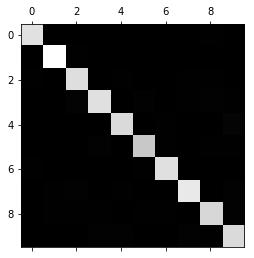

In [16]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

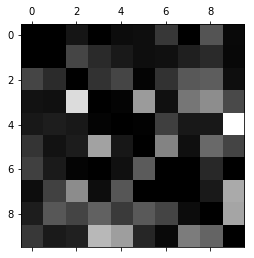

In [17]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [19]:
y_rf_pred = random_forest_clf.predict(X_test)

accuracy_score(y_test, y_rf_pred)

print (precision_score(y_train, y_train_pred, average = None))

[ 0.97724611  0.98060409  0.95614618  0.96218278  0.96716826  0.96756152
  0.97208758  0.97167686  0.95297538  0.94633574]


In [20]:
print (precision_score(y_train, y_train_pred, average = 'weighted'))

0.965610851529


In [21]:
print(recall_score(y_train, y_train_pred, average = None))

[ 0.98615566  0.98234945  0.96609601  0.94617518  0.96816159  0.95738794
  0.98276445  0.96376696  0.95248675  0.94856278]


In [22]:
print(recall_score(y_train, y_train_pred, average = 'weighted'))

0.965616666667


In [23]:
print(f1_score(y_train, y_train_pred, average = None))

[ 0.98168067  0.98147599  0.96109534  0.95411184  0.96766467  0.96244784
  0.97739686  0.96770575  0.952731    0.94744795]


In [24]:
print(f1_score(y_train, y_train_pred, average = 'weighted'))

0.965595105722
